# Task 1: Where's Waldo?

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.


The task includes the following steps:
- Select and implement suitable data preprocessing techniques;
- Identify the appropriate classification approach for a given problem;
- Apply ANN to solve a classification problem.


### Data
The columns of the dataset from `Task_1.csv` are the following:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date





#### Datasets loading

In [ ]:
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('task 1.csv')
data.head()

,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13


In [ ]:
# load the dataset
data_verify = pd.read_csv('task_1_verify.csv')
data_verify.head()

,browser,os,locale,location,sites,time,date
0,Firefox,Windows 7,xh-ZA,USA/New York,"[{'site': 'rr.office.microsoft.com', 'length':...",11:30:00,2016-10-05
1,Chrome,Windows 10,pl-PL,Japan/Tokyo,"[{'site': 'maps.google.com', 'length': 14}, {'...",14:35:00,2016-05-06
2,Firefox,Debian,vi-VN,France/Paris,"[{'site': 'cbk1.googleapis.com', 'length': 178...",14:31:00,2016-03-27
3,Firefox,Debian,en-US,Canada/Vancouver,"[{'site': 'annotathon.org', 'length': 72}, {'s...",10:55:00,2016-12-31
4,Firefox,Debian,en-CA,Australia/Sydney,"[{'site': 'apis.google.com', 'length': 75}, {'...",03:30:00,2017-01-19


### Preprocessing

In [ ]:
# check whether the dataset have missing values
print(f'Number of missing values: {data.isna().sum().sum()}')

Number of missing values: 0


In [ ]:
# find the amount of unique values in each column of the dataset
unique_values = pd.DataFrame({'Feature': data.columns, 
                              'Unique values': data.nunique()})

# sort the amount of unique values in each column in descending order
sorted_unique_values = (unique_values
                       .sort_values(by='Unique values', ascending=False)
)

In [ ]:
sorted_unique_values.head(3)

,Feature,Unique values
index,index,20401
sites,sites,20388
time,time,1440


In [ ]:
# find the proportion of unique names in data
proportion_of_unique_idx = data['index'].nunique() / data.shape[0]
proportion_of_unique_idx

1.0

Based on the obtained proportion of unique values in the `index` column, all values of indexes are unique. Therefore, it can be concluded that this feature does not provide certain information about Waldo, so it is redundant and will not affect the prediction.

In [ ]:
# remove the redundant feature
data = data.drop(['index'], axis=1)

In [ ]:
import json

# extract time per session feature from the sites column
data['session_time'] = (
    data['sites']
    .apply(lambda x: sum(entry['length'] 
                         for entry in json.loads(x.replace("'", "\""))))
)

In [ ]:
# find and print the average session time of Waldo users
t_waldo = int(data[data['user_id'] == 0]['session_time'].mean())
print(f'The average session time of Waldo is {t_waldo}')

The average session time of Waldo is 1102


In [ ]:
# find and print the average session time of users who are not Waldo
t_others = int(data[data['user_id'] != 0]['session_time'].mean().round())
print(f'The average session time of not Waldo users is {t_others}')

The average session time of not Waldo users is 484


As we can observe, Waldo spends more time visiting the sites per one session than other users.

In [ ]:
# find number of unique sites
entries = []
sites = []
for value in data['sites']:
    entries.extend(json.loads(value.replace("'", "\"")))

for entry in entries:
    sites.append(entry['site'])

all_sites = pd.Series(sites)
print(f'Number of unique sites: {all_sites.nunique()}')

Number of unique sites: 11052


In [ ]:
# drop the sites
data = data.drop('sites', axis=1)
data.head()

,browser,os,locale,user_id,location,time,date,session_time
0,Firefox,Windows 10,zh-CN,46,China/Shanghai,14:14:00,2016-01-28,117
1,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,05:23:00,2016-08-26,1559
2,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,12:03:00,2016-03-13,313
3,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,06:08:00,2017-01-19,451
4,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,03:59:00,2017-05-13,164


As can be seen, number of unique sites is quite large, so I decided to remove information about the site addresses.

In [ ]:
# split the location column into 2 new columns
data[['country', 'city']] = (data['location']
                            .str.split(pat="/", expand=True)
)
data = data.drop(['location'], axis=1)

data.head()

,browser,os,locale,user_id,time,date,session_time,country,city
0,Firefox,Windows 10,zh-CN,46,14:14:00,2016-01-28,117,China,Shanghai
1,Internet Explorer,Windows 8,ro-RO,21,05:23:00,2016-08-26,1559,Germany,Berlin
2,Internet Explorer,MacOS,ur-PK,98,12:03:00,2016-03-13,313,Australia,Sydney
3,Internet Explorer,Ubuntu,pl-PL,44,06:08:00,2017-01-19,451,Japan,Tokyo
4,Internet Explorer,Windows 8,bg-BG,59,03:59:00,2017-05-13,164,Japan,Tokyo


In [ ]:
# check the unique values in categorical columns
categ_cols = ['browser', 'os', 'locale', 'city', 'country']
for col in categ_cols:
    print(f'Column {col}: {data[col].unique()}')
    print()

Column browser: ['Firefox' 'Internet Explorer' 'Chrome' 'Safari']

Column os: ['Windows 10' 'Windows 8' 'MacOS' 'Ubuntu' 'Debian' 'Windows 7']

Column locale: ['zh-CN' 'ro-RO' 'ur-PK' 'pl-PL' 'bg-BG' 'fr-FR' 'xh-ZA' 'nl-NL' 'en-AU'
 'en-CA' 'en-NZ' 'vi-VN' 'en-US' 'ja-JP' 'wo-SN' 'uk-UA' 'ru_RU' 'pt-BR'
 'pt-PT' 'en-SG' 'de-DE' 'es-MX' 'it-IT' 'en-GB' 'ru-RU']

Column city: ['Shanghai' 'Berlin' 'Sydney' 'Tokyo' 'Auckland' 'Toronto' 'Amsterdam'
 'Moscow' 'Chicago' 'Singapore' 'San Francisco' 'Rome' 'London' 'Madrid'
 'Vancouver' 'Delhi' 'Paris' 'New York' 'Kuala Lumpur' 'Miami'
 'Rio de Janeiro']

Column country: ['China' 'Germany' 'Australia' 'Japan' 'New Zealand' 'Canada'
 'Netherlands' 'Russia' 'USA' 'Singapore' 'Italy' 'UK' 'Spain' 'India'
 'France' 'Malaysia' 'Brazil']



As can be seen, column `locale` has duplicate values: 'ru_RU' and 'ru-RU'. Let's clean up them:

In [ ]:
# remove duplicate values
cleanup_vals = {'locale': {'ru_RU': 'ru-RU'} }
data.replace(cleanup_vals, inplace=True)

In [ ]:
# find the locale of Waldo users
for loc in data[data['user_id'] == 0]['locale'].unique().tolist():
    print(f'Locale of Waldo users: {loc}')

Locale of Waldo users: ru-RU


In [ ]:
# find the locale of Waldo users
locales = data[data['user_id'] != 0]['locale'].unique().tolist()
print(f'Locale of not Waldo users: {locales}')

Locale of not Waldo users: ['zh-CN', 'ro-RO', 'ur-PK', 'pl-PL', 'bg-BG', 'fr-FR', 'xh-ZA', 'nl-NL', 'en-AU', 'en-CA', 'en-NZ', 'vi-VN', 'en-US', 'ja-JP', 'wo-SN', 'uk-UA', 'pt-BR', 'pt-PT', 'en-SG', 'ru-RU', 'de-DE', 'es-MX', 'it-IT', 'en-GB']


As can be seen, each Waldo user has `ru-RU` locale.

#### Identifying the appropriate classification approach


First, the task is to identify Waldo - the user with user_id=0. So, we have the following class labels: 

*   users with user_id not equal to 0
*   users whose user_id=0 



Therefore, we are dealing with the binary classification problem.

In [ ]:
# select predictors from the dataset
X = data.drop(['user_id'], axis=1)

# create target (1 if Waldo, 0 otherwise)
y = (data['user_id'] == 0).astype('int')

Secondly, let's take a look on the dataset balance. We should check whether the dataset is balanced or not:

In [ ]:
# find the proportion of Waldo class 
waldo_proportion = sum(y == 1) / len(y)
print(f'Proportion of Waldo class in dataset: {waldo_proportion:.4f}')

Proportion of Waldo class in dataset: 0.0196


In [ ]:
# find the proportion of not Waldo class
proportion = sum(y == 0) / len(y)
print(f'Proportion of not Waldo class in dataset: {proportion:.4f}')

Proportion of not Waldo class in dataset: 0.9804


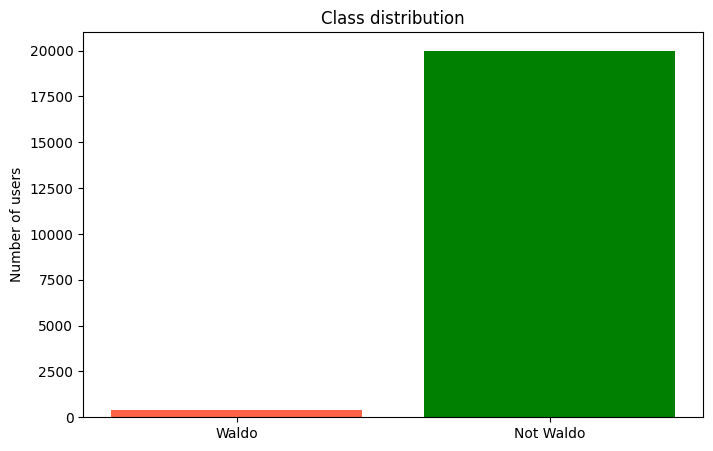

In [ ]:
import matplotlib.pyplot as plt


# plot the number of observations in each target class
fig = plt.figure(figsize = (8, 5))

classes = ['Waldo', 'Not Waldo']
observ = [sum(y == 1), sum(y == 0)]

plt.title('Class distribution')
plt.ylabel('Number of users')
plt.bar(classes, observ, color=['tomato', 'g'])
              
plt.show()

According to the observed proportions of classes and the bar chart above, the target class has an uneven distribution of observations. Therefore, the dataset is imbalanced.

To sum up, in this task we are working with binary imbalanced classification problem.

#### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  
                                                    stratify=y)

#### Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# encode categorical features with one-hot-encoder
def encoding(df, feat_name, encoder):
    new_feats = encoder.transform(df[feat_name])
    new_cols = pd.DataFrame(new_feats, 
                  columns=encoder.get_feature_names_out(feat_name))
    new_df = pd.concat([df.reset_index(drop=True), new_cols], axis=1)    
    new_df.drop(feat_name, axis=1, inplace=True)
    return new_df


# define encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# define categorical features to be encoded
feature_cols = ['browser', 'os', 'locale', 'city', 'country']

# encode categorical features in both training and test datasets
encoder.fit(X_train[feature_cols])
X_train = encoding(X_train, feature_cols, encoder)
X_test = encoding(X_test, feature_cols, encoder)

#### Cyclical features encoding

In [ ]:
secs_in_day = 24 * 60 * 60
avg_days_in_month = 30
days_in_week = 7
months_in_year = 12

# compute sinus transform
def sin_transform(value, total):
    return np.sin(2 * np.pi * value/ total)

# compute cosine transfrom
def cos_transform(value, total):
    return np.cos(2 * np.pi * value/ total)

# encode time feature
def time_encoding(df, feature_name):
    df[feature_name] = pd.to_datetime(df[feature_name], format='%H:%M:%S')
    hours = df[feature_name].dt.hour
    mins = df[feature_name].dt.minute
    secs = df[feature_name].dt.second
    time = hours * 60 * 60 + mins * 60 + secs
    df['sin_time'] = sin_transform(time, secs_in_day)
    df['cos_time'] = cos_transform(time, secs_in_day)
    df.drop([feature_name], axis=1, inplace=True)

# encode date feature
def date_encoding(df, feature_name):
    df[feature_name] = pd.to_datetime(df[feature_name], format='%Y-%m-%d')
    weekday = df[feature_name].dt.weekday
    df['sin_weekday'] = sin_transform(weekday, days_in_week)
    df['cos_weekday'] = cos_transform(weekday, days_in_week)
    year = df[feature_name].dt.year
    df['year'] = year
    month = df[feature_name].dt.month
    df['sin_month'] = sin_transform(month, months_in_year)
    df['cos_month'] = cos_transform(month, months_in_year)
    day = df[feature_name].dt.day
    df['sin_day'] = sin_transform(day, avg_days_in_month)
    df['cos_day'] = cos_transform(day, avg_days_in_month)
    df.drop([feature_name], axis=1, inplace=True)

# encode time and date features in both training and test sets
time_encoding(X_train, 'time')
date_encoding(X_train, 'date')

time_encoding(X_test, 'time')
date_encoding(X_test, 'date')

In [ ]:
print('Total number of features:', X_train.shape[1])

Total number of features: 77


#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# define and fit the standard scaler on training set
scaler = StandardScaler()
scaler.fit(X_train)

# scale features in both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Let's proceed similar steps of preprocessing with data from `task_1_verify.csv`

In [ ]:
# extract time per session feature from the sites column
data_verify['time_per_session'] = (
    data_verify['sites']
    .apply(lambda x: sum(entry['length'] 
                         for entry in json.loads(x.replace("'", "\""))))
)
data_verify = data_verify.drop('sites', axis=1)
data_verify.head()

,browser,os,locale,location,time,date,time_per_session
0,Firefox,Windows 7,xh-ZA,USA/New York,11:30:00,2016-10-05,94
1,Chrome,Windows 10,pl-PL,Japan/Tokyo,14:35:00,2016-05-06,716
2,Firefox,Debian,vi-VN,France/Paris,14:31:00,2016-03-27,679
3,Firefox,Debian,en-US,Canada/Vancouver,10:55:00,2016-12-31,222
4,Firefox,Debian,en-CA,Australia/Sydney,03:30:00,2017-01-19,850


In [ ]:
# split the location column into 2 new columns
data_verify[['country', 'city']] = (data_verify['location']
                                   .str.split(pat="/", expand=True)
)
data_verify = data_verify.drop(['location'], axis=1)
data_verify.head()

,browser,os,locale,time,date,time_per_session,country,city
0,Firefox,Windows 7,xh-ZA,11:30:00,2016-10-05,94,USA,New York
1,Chrome,Windows 10,pl-PL,14:35:00,2016-05-06,716,Japan,Tokyo
2,Firefox,Debian,vi-VN,14:31:00,2016-03-27,679,France,Paris
3,Firefox,Debian,en-US,10:55:00,2016-12-31,222,Canada,Vancouver
4,Firefox,Debian,en-CA,03:30:00,2017-01-19,850,Australia,Sydney


In [ ]:
# remove duplicate values
cleanup_vals = {'locale': {'ru_RU': 'ru-RU'} }
data_verify.replace(cleanup_vals, inplace=True)

In [ ]:
# one-hot-encode categorical features
data_verify = encoding(data_verify, feature_cols, encoder)

# encode time and date features
time_encoding(data_verify, 'time')
date_encoding(data_verify, 'date')

# scale features
scaler.fit(data_verify) 
data_verify = scaler.transform(data_verify)

### ANN Model

In [ ]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
# create class for a dataset
class Dataset(Dataset):
    def __init__(self, features, target=None):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, i):
        x = torch.tensor(self.features[i], dtype=torch.float)
        if self.target is None:
            return x
        else:
            y = torch.tensor(self.target[i], dtype=torch.float)
            return x, y


# create class for a model
class Model(nn.Module):
    def __init__(self, input=77, output=1):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64), 
            nn.ReLU(), 
            nn.Dropout(p=0.2),
            nn.Linear(64, output)
        )
        
    def forward(self, x):
        return self.model(x)
        

In [ ]:
# define train dataset using Dataset class
train_dataset = Dataset(X_train, np.array(y_train))

# split the train dataset into train (90%) and validation (10%) sets
size = len(train_dataset)
train_dataset, val_dataset = random_split(train_dataset, 
                            [int(0.9 * size), (size - int(0.9 * size))])

# define test dataset using Dataset class
test_dataset = Dataset(X_test, np.array(y_test))

# define size of the batch
batch_size = 64

# create data loaders for train, validation and test sets
train_dataloader = DataLoader(train_dataset, 
                              batch_size=batch_size, 
                              shuffle=True)

val_dataloader = DataLoader(val_dataset, 
                             batch_size=batch_size, 
                             shuffle=False)

test_dataloader = DataLoader(test_dataset, 
                             batch_size=batch_size, 
                             shuffle=False) 

# set the device to either GPU or CPU
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# define a model 
model = Model(input=77, output=1).to(device)
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=77, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=64, out_features=1, bias=True)
  )
)


### Training & Validation

In [ ]:
from tqdm import tqdm
from sklearn.metrics import recall_score, precision_score, f1_score 


# define the learning rate and number of epochs to train the model for
lr = 0.001
epochs = 30

# define the loss function
loss_fn = nn.BCEWithLogitsLoss()

# define the optimizer
opt = torch.optim.Adam(model.parameters(), lr=lr)

# define the learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)


# define the train function to train the model
def train(model, device, train_loader, loss_fn, opt, epoch):
    # set the model to the training mode
    model.train()
    train_loss = 0
    bar = tqdm(train_loader)
    # iterate through the data loader
    for input, target in bar:
        input, target = input.to(device), target.to(device)
        opt.zero_grad()
        pred = model(input)
        loss = loss_fn(pred, target.unsqueeze(1))
        loss.backward()
        opt.step()
        train_loss += loss.item()
        
    # print and return the average loss 
    avg_loss = train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{epochs}: loss = {avg_loss}')
    return avg_loss
    

# define the evaluate function for validation
def evaluate(model, device, val_loader, loss_fn, opt):
    model.eval()
    preds = []
    true_target = []
    val_loss = 0
    with torch.no_grad():
        # iterate over validation data
        for input, target in val_loader:
            input, target = input.to(device), target.to(device)
            pred = model(input)
            loss = loss_fn(pred, target.unsqueeze(1))
            val_loss += loss.item()
            preds.append(((torch.sigmoid(pred.cpu().data)) > 0.5) * 1)
            true_target.append(target.cpu().data.numpy().reshape(-1, 1))

    # calculate and print validation metrics for imbalanced case
    precision = precision_score(np.vstack(preds), np.vstack(true_target))
    recall = recall_score(np.vstack(preds), np.vstack(true_target))
    f1 = f1_score(np.vstack(preds), np.vstack(true_target))
    avg_val_loss = val_loss / len(val_loader)

    print(f'val loss = {avg_val_loss}, val precision = {precision}, val recall = {recall}, val f1 score = {f1}')
    
    # return the average validation loss
    return avg_val_loss


losses = []
val_losses = []
for epoch in range(epochs):
    # train the model
    train_loss = train(model, device, train_dataloader, loss_fn, opt, epoch)
    losses.append(train_loss)

    # evaluate the model on the validation set
    val_loss = evaluate(model, device, val_dataloader, loss_fn, opt)
    val_losses.append(val_loss)

    # step the learning rate scheduler
    lr_scheduler.step()

100%|██████████| 230/230 [00:00<00:00, 280.56it/s]


Epoch 1/30: loss = 0.19878440964157168
val loss = 0.036104450575434245, val precision = 0.8, val recall = 1.0, val f1 score = 0.888888888888889


100%|██████████| 230/230 [00:00<00:00, 326.90it/s]


Epoch 2/30: loss = 0.027945035112940747
val loss = 0.010380396923909966, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 319.84it/s]


Epoch 3/30: loss = 0.013318464765325189
val loss = 0.004734574020123825, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 334.11it/s]


Epoch 4/30: loss = 0.0090975779371903
val loss = 0.0032302139398570242, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 326.97it/s]


Epoch 5/30: loss = 0.006493612920420002
val loss = 0.0018853048565618407, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 316.09it/s]


Epoch 6/30: loss = 0.005585176119094958
val loss = 0.00125383054658484, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 338.52it/s]


Epoch 7/30: loss = 0.00461490273693293
val loss = 0.0009156311336062992, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 331.93it/s]


Epoch 8/30: loss = 0.0046370241798602205
val loss = 0.0005820888663248087, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 312.80it/s]


Epoch 9/30: loss = 0.004042090413175807
val loss = 0.0007108746537526783, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 337.64it/s]


Epoch 10/30: loss = 0.00424561882075226
val loss = 0.0008345251794358214, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 340.19it/s]


Epoch 11/30: loss = 0.002797591268545543
val loss = 0.000650402963891303, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 270.41it/s]


Epoch 12/30: loss = 0.002544616282102652
val loss = 0.000570716946990265, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 239.65it/s]


Epoch 13/30: loss = 0.002391149646744294
val loss = 0.0005470563337439671, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 259.10it/s]


Epoch 14/30: loss = 0.002358104932531917
val loss = 0.0005763623037357599, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 326.16it/s]


Epoch 15/30: loss = 0.0023231275437865405
val loss = 0.0005511006954923057, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 341.96it/s]


Epoch 16/30: loss = 0.0021519986826562037
val loss = 0.00045059381395381375, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 334.62it/s]


Epoch 17/30: loss = 0.002148768290214281
val loss = 0.0005328597018468337, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 321.61it/s]


Epoch 18/30: loss = 0.0023400318271065454
val loss = 0.0004837497007639076, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 321.56it/s]


Epoch 19/30: loss = 0.0020268887721771457
val loss = 0.00041908021068173606, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 334.70it/s]


Epoch 20/30: loss = 0.0019467596866256233
val loss = 0.0004632745622075163, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 332.18it/s]


Epoch 21/30: loss = 0.001979985541180687
val loss = 0.0003573586050501595, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 332.19it/s]


Epoch 22/30: loss = 0.0021668212854622296
val loss = 0.0004299582528451887, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:01<00:00, 181.78it/s]


Epoch 23/30: loss = 0.002096966905051174
val loss = 0.0003754115325416653, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 335.06it/s]


Epoch 24/30: loss = 0.0018720682232726729
val loss = 0.0003899850621215032, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 338.59it/s]


Epoch 25/30: loss = 0.0017083505020507248
val loss = 0.0004275816460834064, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 346.44it/s]


Epoch 26/30: loss = 0.0018937455098595186
val loss = 0.000423672716771342, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 255.84it/s]


Epoch 27/30: loss = 0.0017499773653031772
val loss = 0.00042328324063698977, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 233.50it/s]


Epoch 28/30: loss = 0.0017720655929145362
val loss = 0.0004809467587060331, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 285.46it/s]


Epoch 29/30: loss = 0.001566018935219567
val loss = 0.0005355581219751352, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


100%|██████████| 230/230 [00:00<00:00, 343.30it/s]


Epoch 30/30: loss = 0.001926912253206272
val loss = 0.0003271388573361597, val precision = 1.0, val recall = 1.0, val f1 score = 1.0


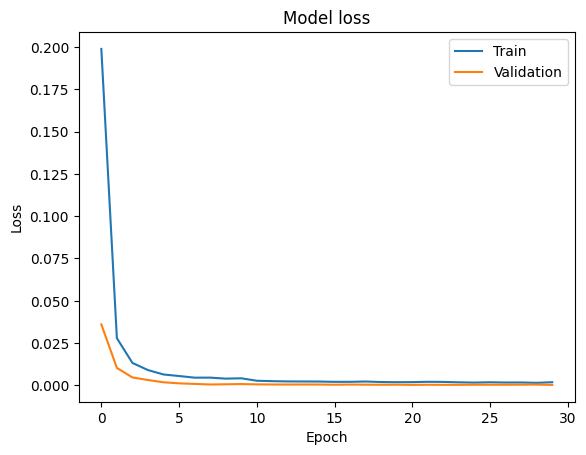

In [ ]:
# plot the train and validation losses 
plt.plot(losses)
plt.plot(val_losses)

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

### Evaluate the model on test data

In [ ]:
from sklearn.metrics import classification_report

# define the test function 
def test(model, device, test_loader):
    model.eval()
    preds = []
    true_target = []
    test_loss = 0
    with torch.no_grad():
        # iterate over test data
        for input, target in test_loader:
            input, target = input.to(device), target.to(device)
            pred = model(input)
            preds.append(((torch.sigmoid(pred.cpu().data)) > 0.5) * 1)
            true_target.append(target.cpu().data.numpy().reshape(-1, 1))
    # return predictions and actual targets
    return preds, true_target


# test the model
y_pred, y_true = test(model, device, test_dataloader)

# report metrics on test set
print(classification_report(np.vstack(y_true), np.vstack(y_pred)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4001
         1.0       0.94      0.97      0.96        80

    accuracy                           1.00      4081
   macro avg       0.97      0.99      0.98      4081
weighted avg       1.00      1.00      1.00      4081



#### Predict each user in `task_1_verify.csv`

In [ ]:
# define a function to get predictions
def predict(model, device, dataloader):
    model.eval()
    preds = []
    with torch.no_grad():
        for input in dataloader:
            input = input.to(device)
            pred = model(input)
            preds.append(((torch.sigmoid(pred.cpu().data)) > 0.5) * 1)
    
    return preds


# create a dataset for data_verify from 'task_1_verify.csv'
verify_dataset = Dataset(data_verify)

# create the data loader for the verify dataset
verify_loader = DataLoader(verify_dataset, 
                           batch_size=batch_size, 
                           shuffle=False)

# get the prediction
prediction = np.vstack(predict(model, device, verify_loader)).flatten()

# print the prediction where 1 - waldo, 0 - user is not waldo
for i in range(len(prediction)):
    print(i, ':', prediction[i])
  

0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
11 : 0
12 : 0
13 : 0
14 : 0
15 : 0
16 : 0
17 : 0
18 : 0
19 : 0
20 : 0
21 : 0
22 : 0
23 : 0
24 : 0
25 : 0
26 : 0
27 : 0
28 : 0
29 : 0
30 : 0
31 : 1
32 : 1
33 : 1
34 : 1
35 : 1


As was obtained, the last 5 users from `task_1_verify.csv`are Waldo.

### Comments:
1. Some usefull insights from the data analysis:
    - Firstly, I have observed an unbalanced distribution of class labels, i.e. there are only 2% of samples in data associated with Waldo user label. As a result, to evaluate the model's performance further, I use such metrics as recall, precision and F1 score.
    - Additionaly, I found out that average sites session time of Waldo users is almost 2.5 times higher than the average session time of not Waldo users, namely 1102 seconds against 484 seconds.
    - What is more, all Waldo users have `ru-RU` locale identifier.
2. Preprocessing techniques used:
    - First of all, I checked the dataset for missing values and duplicated values in the columns. I observed that the dataset have no missing values, so there is no need to impute them. The column `locale` has the duplicates `ru-RU` and `ru_RU`, so I handle them.
    - I removed redundant features that seemed irrelevant, such as `index` and `sites`.
    - To encode categorical features, I used One-Hot encoding, since the features (`city`, `country`, etc.) have no ordinal relationship. Also, I encode cyclical features `time` and `date` using sin and cosine transforms.
    - Finally, I applied feature normalization to zero mean and unit variance using Standard Scaler.
3. How the model architecture was reached:
    - To begin with, I determined the input and output layer dimensionality as 77 and 1, respectively. 
    - I researched and found a relevant [article](https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89) that dealt with the similar problem and performed quite well. I decided to construct my model with the same number of layers, number of neurons and same activation functions. 
    - I held out 20% of the data as a test set. Furthermore, I splitted the remaining data into train and val splits. The training set was used to optimize the model parameters during training. In contrast, the validation set was employed to tune the model's hyperparameters (number of hidden layers, dimensionality, etc.). As part of the validating process, I also tried different values of probability in the Dropout layer and determined that p=0.2 performed better in this task.
    